In [171]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def GenerateRandomUniform(N: int):
    array = np.random.uniform(0, 1, N)
    array.sort()
    return array

def ModulateKsi(N: int, theta: float):
    eta = GenerateRandomUniform(N)
    return (1 - eta) ** (1 / (1 - theta))

In [137]:
N = 100
theta = 5
generated = ModulateKsi(N, teta)
print("Сгенерированная выборка = ", generated)

Сгенерированная выборка =  [1.00162815 1.00439046 1.00486633 1.00759367 1.01417426 1.0176472
 1.02144921 1.02162952 1.02221467 1.02542734 1.0256334  1.03010196
 1.04251146 1.04342468 1.04937919 1.05087438 1.05860595 1.0586852
 1.05958342 1.06353174 1.06618924 1.07249034 1.07833625 1.08222033
 1.08614587 1.0861611  1.09096549 1.09582713 1.09741201 1.0990748
 1.09917187 1.10323643 1.10462443 1.10590666 1.1066166  1.12876273
 1.1310399  1.13893257 1.13979728 1.14572992 1.14589866 1.15402701
 1.16819982 1.17029212 1.17106484 1.1766026  1.17847779 1.17991612
 1.18159221 1.18206274 1.1842575  1.19129338 1.1918878  1.19238094
 1.19859467 1.2003451  1.21350414 1.22512394 1.23585275 1.23609149
 1.24880118 1.26780363 1.27310402 1.27533807 1.29881192 1.30350896
 1.30764152 1.33586845 1.35903298 1.37681247 1.37950816 1.38087994
 1.39026714 1.41124751 1.44040827 1.48149048 1.48222337 1.4847128
 1.51199679 1.5927693  1.61192025 1.61588408 1.63962822 1.66596156
 1.72087766 1.77902613 1.82473941 1.843

# Асимптотические доверительные интервалы. ОМП

In [138]:
def ThetaWave(sample):
    return  len(sample) / sum(np.log(sample)) + 1

In [139]:
def ConfidenceIntervalAsymptoticMedian(sample):
    theta_wave = ThetaWave(sample)
    power = 1 / (theta_wave - 1)
    powered_2 = 2 ** power
    n = len(x)
    same_part = 1.96 * np.log(2) * powered_2 / np.sqrt(n) / (theta_wave - 1)
    n = len(sample)
    left = - same_part + powered_2
    right = same_part + powered_2
    return left, right

In [155]:
a, b = ConfidenceIntervalAsymptoticMedian(generated)
print(a, b)
print("ОМП медиана. Длина =", b - a)

1.156386284658665 1.2417091352087142
ОМП медиана. Длина = 0.08532285055004918


In [141]:
def ConfidenceIntervalAsymptoticTheta(sample):
    theta_wave = ThetaWave(sample)
    n = len(sample)
    left = -1.96 * (theta_wave - 1) / n ** 0.5 + theta_wave
    right = 1.96 * (theta_wave - 1) / n ** 0.5 + theta_wave
    return left, right

In [154]:
a, b = ConfidenceIntervalAsymptoticTheta(generated)
print(a, b)
print("ОМП θ. Длина =", b - a)

4.070002183842472 5.566819168999497
ОМП θ. Длина = 1.4968169851570252


# Bootstrap

In [112]:
def BootstrapGenerate(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]

In [117]:
def ParetoGenerate(sample, N):
    theta_wave = ThetaWave(sample)
    n = len(sample)
    return [ModulateKsi(n, theta_wave) for _ in range(N)]

### θ bootstrap

In [129]:
def BootstrapParametricTheta(sample):
    N = 50000
    generated_with_model = ParetoGenerate(sample, N)
    param = []
    
    for current_sample in generated_with_model:
        param.append(ThetaWave(current_sample))
    param = np.sort(param)
    k1 = int((1 - 0.95) * N / 2) - 1
    k2 = int((1 + 0.95) * N / 2) - 1
    return param[k1], param[k2]

In [156]:
a, b = BootstrapParametricTheta(generated)
print(a, b)
print("Параметрический bootstrap θ. Длина =", b - a)

4.171394084338648 5.696811582741206
Параметрический bootstrap θ. Длина = 1.5254174984025575


In [131]:
def BootstrapNotParametricTheta(sample):
    bootstrap_generated = BootstrapGenerate(sample)
    theta_wave = ThetaWave(sample)
    delts = []
    for current_sample in bootstrap_generated:
        theta_star = ThetaWave(current_sample)
        delts.append(theta_star - theta_wave)
    delts = np.sort(delts)
    return (-delts[974] + theta_wave , -delts[24] + theta_wave)

In [170]:
a, b = BootstrapNotParametricTheta(generated)
print(a, b)
print("Непараметрический bootstrap θ. Длина =", b - a)

4.0273441116839805 5.445853332984656
Непараметрический bootstrap θ. Длина = 1.4185092213006758


### Медиана bootstrap

In [163]:
def EstimationMedian(x):
    return np.power(2, 1 / (ThetaWave(x) - 1))

def BootstrapParametricMedian(x):
    N = 50000
    generated_with_model = ParetoGenerate(x, N)
    medians = []
    for current_sample in generated_with_model:
        medians.append(EstimationMedian(current_sample))
    medians = np.sort(medians)
    k1 = int((1 - 0.95) * N / 2) - 1
    k2 = int((1 + 0.95) * N / 2) - 1
    return medians[k1], medians[k2]

In [164]:
a, b = BootstrapParametricMedian(generated)
print(a, b)
print("Параметрический bootstrap медиана. Длина =", b - a)

1.1590463736208636 1.2449172110287317
Параметрический bootstrap медиана. Длина = 0.08587083740786805


In [165]:
def BootstrapNonParametricMedian(sample):
    botstrap_generated = BootstrapGenerate(sample)
    theta_ = ThetaWave(sample)
    median_star = 2 ** (1 / (theta_ -1 ))
    delts = []
    for current_sample in botstrap_generated:
        delts.append(np.median(current_sample) - median_star)
    delts = np.sort(delts)
    return (max(-delts[974] + median_star, 0) , -delts[24] + median_star)

In [166]:
BootstrapNonParametricMedian(generated)
print(a, b)
print("Неаараметрический bootstrap медиана. Длина =", b - a)

1.1590463736208636 1.2449172110287317
Неаараметрический bootstrap медиана. Длина = 0.08587083740786805


# Сравнение 

In [167]:
def Compare(sample, func_list, names_list):
    h = 0
    for f in func_list:
        left, right = f(sample)
        x = np.linspace(left, right, len(sample))
        y = [h] * len(x)
        plt.plot(x, y)
        h -= 0.1 
    plt.legend(names_list, loc='upper right', framealpha=0.1, fontsize='x-small')
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)

### Сравнение доверительных интервалов θ

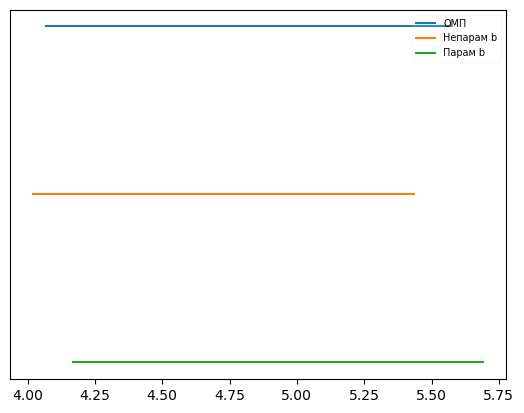

In [168]:
func_list_theta = [ConfidenceIntervalAsymptoticTheta, BootstrapNotParametricTheta,  BootstrapParametricTheta ]
names_list_theta = ['ОМП', 'Непарам b', 'Парам b']
Compare(generated, func_list_theta, names_list_theta)

### Сравнение доверительных интервалов для медианы 

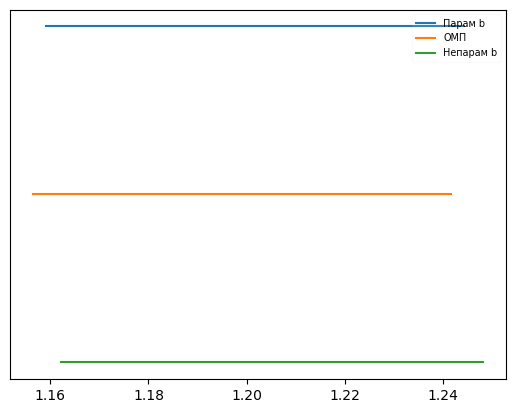

In [169]:
func_list_median = [ BootstrapParametricMedian, ConfidenceIntervalAsymptoticMedian, BootstrapNonParametricMedian]
names_list_median = ['Парам b', 'ОМП', 'Непарам b']
Compare(generated, func_list_median, names_list_median)